<a href="https://colab.research.google.com/github/salonichaturvedi/ML-Projects/blob/main/Zenith%20Bank/Zenit_Customer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> Logistic Regression

##<center> Case Study

#<center> Predict Potential Loan Customers




#<center> Problem Description

We have data from Zenith bank that has a growing customer base. 
A bank has 2 types of customers :
    1. Liability Cutomers : Those who have deposits with the bank
    2. Asset Customers    : Those who have a loan with the bank
    
For Zenith bank, the majority of customers are liability customers currently (depositors). They are struggling with lower ratio of borrowers (Assets). To address this problem, they are going to run a huge campaign with a lot of Marketing Spend to increase the borrowers. The request is to provide them with a ML model that can guide them on which customers to target so that their spends are efficiently utilised. 


As a Data scientist, we have to build a model for Zenith Bank that will ease the task of marketing department by predicting most likely borrowers</p>
  
    
Main Objective of this exercise : To understand Logistic regression and explore this algorithm using Sklearn and related concepts like Roc-Auc Curve, Coefficients, Feature Selection etc

**Questions to be answered-**
* Which customers will borrow a loan?
* From the given data, which features are most significant in determining above.

In [ ]:
#Importing Initial Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Data to a Pandas Dataframe and creating a copy to perform EDA

original_data = pd.read_csv('/content/zenith_bank_customer_loans.csv')

In [ ]:
customers_data = original_data.copy()

# Data Dictionary

* ID: Unique ID of Customer
* Age: Age of the Customer
* Experience: Years of experience
* Income: Annual income `(in $1000)`
* ZIP Code: ZIP code of residence
* Family: Count of family members
* CCAvg: Avg Monthly Spending on Credit Card `(in $1000)`
* Education: 1- Undergrad; 2- Graduate;3- Advanced/Professional
* Mortgage: House Mortgage (in $1000)
* Personal_Loan: Flag indicating whether customer opted for loan previously or not ( 1 - Opted for loan)
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Flag indicating whether the customer has a certificate of deposit (CD) account with the bank
* Online: Flag indicating whether the customer use internet banking facilities
* CreditCard: Flag indicating whether the customer use a credit card issued by any other Bank (excluding Zenith Bank)?
   

### Glancing at the basic characteristics of our data

In [ ]:
print("Rows: ", customers_data.shape[0])
print("Columns: ", customers_data.shape[1])

Rows:  5000
Columns:  14


In [ ]:
list_of_features = customers_data.columns.tolist()
list_of_features

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [ ]:
customers_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
customers_data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#<center> Preprocessing Data

##Basic Data Checks

### Checking for missing value

In [ ]:
customers_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Number of Unique values in each column
It can help us in determining categorical / continous features.

In [ ]:
customers_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Observation**: 

1.   No Null values / Missing values
2.   All the columns are numerical here,
3. **Personal Loan** is *Target Variable*
4. **Zipcode, Family, Education, Securities, CD_Account, Online, Credit Card**  are *Categorical Variables*





Let's check how our data looks like again to see if there are any irrelevant columns from EDA and ML perspective-

In [ ]:
customers_data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3844,3845,51,27,75,95828,1,2.7,1,0,0,0,0,0,0
2220,2221,65,40,80,94105,1,0.8,3,0,0,0,0,1,0
3504,3505,46,20,15,95370,4,0.6,3,0,0,1,0,1,0
112,113,40,15,82,91775,3,1.0,1,309,0,0,0,0,0
1500,1501,54,28,74,95014,2,1.1,1,0,0,0,0,1,0
1424,1425,29,3,92,94539,2,1.3,1,287,0,0,0,1,0
2550,2551,32,8,20,93106,1,0.5,3,102,0,0,0,1,0
1899,1900,59,33,34,94115,1,0.2,1,0,0,0,0,1,0
504,505,40,10,44,94720,3,2.0,3,0,0,0,0,1,0
2986,2987,55,30,153,94305,2,2.8,2,0,1,1,1,1,0


**Observation**: 
ID Column is not useful for EDA / ML modelling, hence can be dropped.

In [ ]:
#Dropping ID Column

customers_data = customers_data.drop(labels = 'ID', axis = 1)

In [ ]:
customers_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Renaming Columns

It is always better to not have any spaces in between columns. It allows for more flexibility in some functions and operations. 
For Ex: Statsmodel syntax doesn't allow feature names to have spaces in between.

In [ ]:
customers_data.rename(columns = {'ZIP Code':'ZIP_Code', 'Personal Loan': 'Personal_loan', 'Securities Account': 'Securities_Account', 'CD Account': 'CD_Account'}, inplace=True)

In [ ]:
customers_data.columns

Index(['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

### Processing Zipcodes

We also have Zipcodes as a feature in our data. We can leverage zipcodes library in Python to map Zipcodes to countries. It will provide us a with better insight rather than using Zipcodes directly.

Improving our data with any means possible is one of the key steps in a ML project. The goal is to maximize the efficiency of data information we have.


In [ ]:
# Checking number of unique zipcodes again

customers_data['ZIP_Code'].nunique()

467

In [ ]:
zipcodes = customers_data['ZIP_Code'].unique()
zipcodes[0:5] 

array([91107, 90089, 94720, 94112, 91330])

In [ ]:
# Installing zipcodes library to map zipcodes to corresponding countries

!pip install zipcodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mapping Zipcodes to Counties
import zipcodes as zp

zip_dict={}

for i in zipcodes:
  city_county = zp.matching(i.astype('str'))

  # If Zipcode exits, ,map county
  if (len(city_county)==1):
    county = city_county[0].get('county')
  
  # Otherwise assign Zipcode only as County
  else:
    county = i

  zip_dict.update({i:county})
zip_dict


{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [ ]:
# Checking our mapping

missing_zipcodes=[]
for i in zipcodes:
  if i not in zip_dict.keys():
    missing_zipcodes.append(i)

missing_zipcodes


[]

In [ ]:
len(zipcodes) - len(zip_dict.values())

0

In [ ]:
customers_data['County'] = customers_data['ZIP_Code'].map(zip_dict)

In [ ]:
#Chwcking number of unique counties

customers_data['County'].nunique()

42

Checking features in our new dataframe after counties addition, just to verify-

In [ ]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP_Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


### Fixing Data Types:


*'INT'* Datatype takes up more space than *'CATEGORY'* Datatype. Some of the Categorical features are stored as Int Type. It would be space efficient, as well as time efficient for us to save them as **Category** type instead.

In [ ]:
cat_features = ['Personal_loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family', 'ZIP_Code', 'Education', 'County']
customers_data[cat_features] = customers_data[cat_features].astype('category')

In [ ]:
# Veryfying the changed Data types

customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP_Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


**Observation:**
**Memory reduced from 547.00 KB to 266.40 KB**

In [ ]:
customers_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


As we can notice, Experience has negative values, 

Let's explore more on that:
1. Checking the total count of such values
2. Checking in what Age Range, these values lie.

In [ ]:
customers_data[customers_data['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

There are 52 instances of Experience column having negative values, and these lie between the age of 23 to 29.

In [ ]:
customers_data.groupby(by=['Age', 'Education'])['Experience'].describe().T

Age              23                   24                       25             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26            ...         64         65  \
Education          3          1         2  ...          3          1   
count      19.000000  30.000000  24.00000  ...  30.000000  30.000000   
mean       -0.526316   1.433333   0.75000  ...  38.533333  39.866667   
std         0.696692   0.817200   0.84699  ...   1.756433   0.730297   
min        -2.000000   0.000000  -1.00000  ...  34.000000  39.000000   
25%        -1.000000   1.000000   0.00000  ...  38.000000  39.000000   
50%        -1.000000   2.000000   1.00000  ...  39.000000  40.000000   
75%         0.000000   2.000000   1.00000  ...  40.000000  40.000000   
max         1.000000   2.000000   2.00000  ...  40.000000  41.000000   

Age                                     66                               67  \
Education          2          3          1          2          3          1   
count      23.000000  27.000000   9.000000   5.000000  10.000000   5.000000   
mean       40.086957  39.518519  41.111111  41.400000  40.400000  41.600000   
std         0.733178   1.553417   0.333333   0.547723   1.646545   0.894427   
min        39.000000  35.000000  41.000000  41.000000  36.000000  41.000000   
25%        40.000000  39.000000  41.000000  41.000000  40.250000  41.000000   
50%        40.000000  40.000000  41.000000  41.000000  41.000000  41.000000   
75%        41.000000  41.000000  41.000000  42.000000  41.000000  42.000000   
max        41.000000  41.000000  42.000000  42.000000  42.000000  43.000000   

Age                             
Education          2         3  
count       3.000000   4.00000  
mean       42.666667  41.50000  
std         0.577350   0.57735  
min        42.000000  41.00000  
25%        42.500000  41.00000  
50%        43.000000  41.50000  
75%        43.000000  42.00000  
max        43.000000  42.00000  

[8 rows x 134 columns]

As per Education and Age, it is evident that these values are negative erronously. 
Hance converting these into Absolute Values.

In [ ]:
customers_data.loc[customers_data['Experience']<0, 'Experience'] = np.abs(customers_data['Experience'])

#<center> Exploratory Data Analysis

### EDA | 5 Point Summary

In [ ]:
customers_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,1.937938,56.498800
std,11.463166,11.415189,46.033729,1.747659,101.713802
min,23.000000,0.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000




*   The Experience seems to be fine now, as the minimum experience is 0.
*   Age ranges from 23-67. Mean Age of applicants is 45.
*   Income ranges from 8 grands to 224 grands, with mean at 73.
*   Credit Card Average Spend ranges from 0 grand to 10 grands, with average customer spending 1.93 grands.
*   Mortgage ranges between 0 and 635 grands. Mean lies at 56.








### EDA | Value counts for Categorical columns

In [ ]:
for feature in cat_features:
  print(feature, ' :\n ', customers_data[feature].value_counts())
  print('*' * 55)

Personal_loan  :
  0    4520
1     480
Name: Personal_loan, dtype: int64
*******************************************************
Securities_Account  :
  0    4478
1     522
Name: Securities_Account, dtype: int64
*******************************************************
CD_Account  :
  0    4698
1     302
Name: CD_Account, dtype: int64
*******************************************************
Online  :
  1    2984
0    2016
Name: Online, dtype: int64
*******************************************************
CreditCard  :
  0    3530
1    1470
Name: CreditCard, dtype: int64
*******************************************************
Family  :
  1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
*******************************************************
ZIP_Code  :
  94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIP_Code, Length: 467, dtype: int64
*************************************

**Insights**



*   A maximum of *1095* customers belong to *Los Angeles County*
*   Only approximately 11% customer (480) had borrowed loan previously.



### EDA | Univariate Analysis - Continous Variables

Below function plots a graph for univariate analysis of all continous features Distribution, so that Central Tendency and outliers can be analysed.

In [ ]:
from seaborn.matrix import despine
def univariate_graphs(dataset, category_name):
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5))

  ax1 = ax[0]
  ax2 = ax[1]
  
  fig.suptitle('Univariate Plot on: ' + category_name, fontsize=15, fontweight='bold')
  
  sns.boxplot(data = dataset, x=dataset[category_name], ax=ax1)
  sns,despine(top=True, right=True, left = True)
  sns.distplot(x= dataset[category_name], ax=ax2 )

  mean = dataset[category_name].mean()
  mode = dataset[category_name].mode().tolist()[0]
  median = dataset[category_name].median()

  ax2.axvline(mean, color='r', linestyle='--', linewidth=2)
  ax2.axvline(mode, color='g', linestyle='-', linewidth=2)
  ax2.axvline(median, color='b', linestyle='-', linewidth=2)

  plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

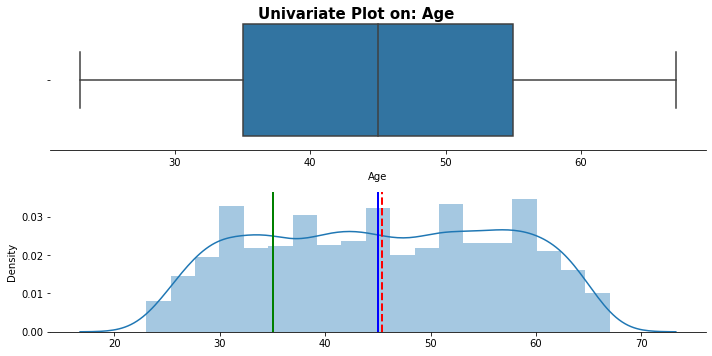

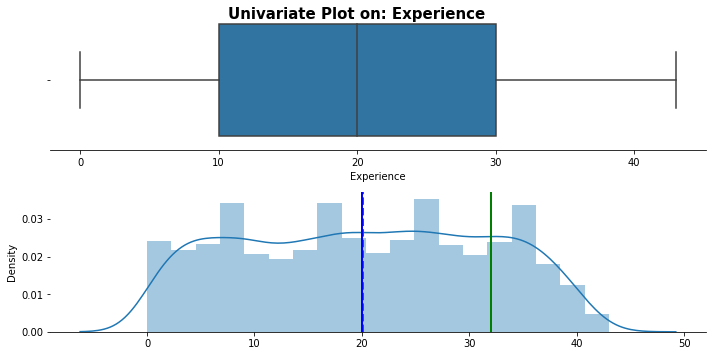

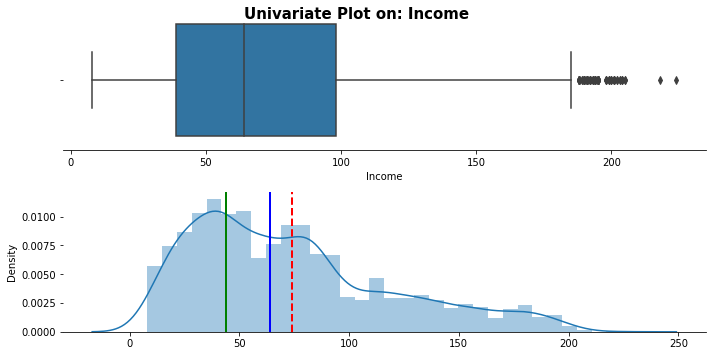

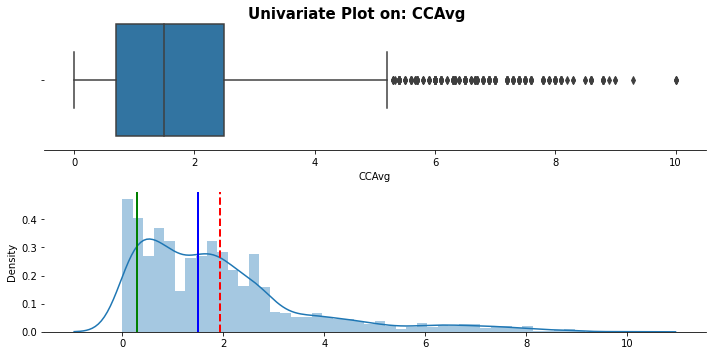

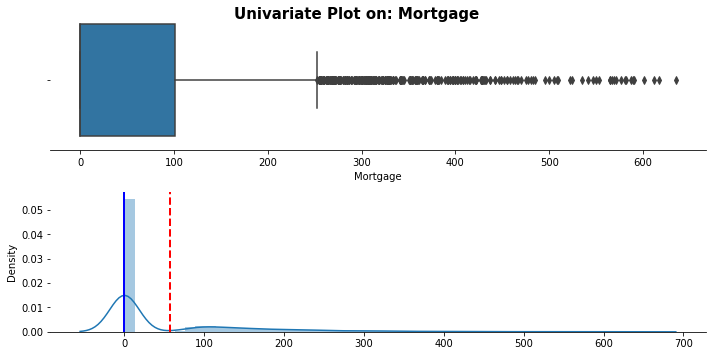

In [ ]:
univariate_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in univariate_features:
  univariate_graphs(customers_data, feature)

**Observations**

*   Age and experinece have similar distribution.
*   Income, Mortgage and CCAvg all are Right Skewed.
*   Mosrtage is 0 for most of customers.






### EDA | Univariate Analysis - Categorical Variables

Before we proceed with this analysis, it is better to readjust some of the categorical features into specific bins or segments for better analysis.

Converting Age into Age Bins

In [ ]:
customers_data['Age_Bins'] = pd.cut(x= customers_data['Age'], bins = [0,30,40,50,60,100], labels = ['Below_30', '31-40', '41-50', '51-60', 'Above_60'])

Converting Income into Income Bins, so as to derive Customer Segment based on Income.

In [ ]:
customers_data['Income_Bins'] = pd.cut(x= customers_data['Income'], bins = [0,50,140,224], labels = ['Lower', 'Middle', 'Higher'])

Converting CCAvg spend into Bins. 

In order to find the best boundaries for low / medium / high segment, lets look at the CCAvg 5 point summary first.


In [ ]:
customers_data['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

Observation: 0.7 and 2.5 seem to be good boundary points.

In [ ]:
customers_data['Spending_Segment'] = pd.cut(x= customers_data['CCAvg'], bins = [0.00, 0.70, 2.5, 10.00], labels = ['Lower', 'Middle', 'Higher'], include_lowest=True)

In [ ]:
# Checking if the above introduced columns are added correctly

customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP_Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  Age_Bins            5000 non-null   category
 15  Income_Bins         5000 non-null   ca

### Univariate Analysis - Categorical Variables 

(We will analyse counties saperately as they are a lot in number)

In [ ]:
# creating a list of all categorical columns 

cat_cols = []
for i in customers_data.columns.tolist():
  if customers_data[i].dtype == 'category':
    cat_cols.append(i)

# removing 'County' form the list 
cat_cols.remove('County')
cat_cols

['ZIP_Code',
 'Family',
 'Education',
 'Personal_loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Age_Bins',
 'Income_Bins',
 'Spending_Segment']

In [ ]:
# creating copy of 'cat_cols' dropping 'ZIP_Code' 

cat_cols1 = cat_cols[1:]
cat_cols1

['Family',
 'Education',
 'Personal_loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Age_Bins',
 'Income_Bins',
 'Spending_Segment']

In [ ]:
# Creating a list of Titles to be used in the Categorical Graph Charts 

title_list = ['Family Members Count X Count of Customers', 'Customers X Education Profile',
              'Customers with/without Personal Loan', 'Customers with/without Security Account', 
              'Customers with/without CD_Account', 'Customers with/without Online Banking', 'Customers with/without Credit Card',
              'Customers X Age Bins', 'Customers X Income Bins', 'Customers X Spending Segment']

In [ ]:
def univariate_categorical_graphs(dataset, featureset, titleset):
  plt.figure(figsize=(15,20))
  i=0
  for i in range(len(featureset)):
    plt.subplot(5,2,i+1)                             # Adjusting logic for subplots

    pt=sns.countplot(x=dataset[featureset[i]], data=dataset)  # plotting countplot
    sns.despine(top=True, left=True, right=True)     # Removing unnecessary boundaries

    for p in pt.patches:                             # using matplotlib axes objects to show percentages
      perc='{:.1f}%'.format(100*p.get_height()/len(dataset[featureset[i]]))
      x= p.get_x() + p.get_width()/2
      y= p.get_y() + p.get_height()
      plt.annotate(perc, xy=(x,y), ha='center')

    plt.tight_layout()
    plt.title(titleset[i], color='b')
  

  

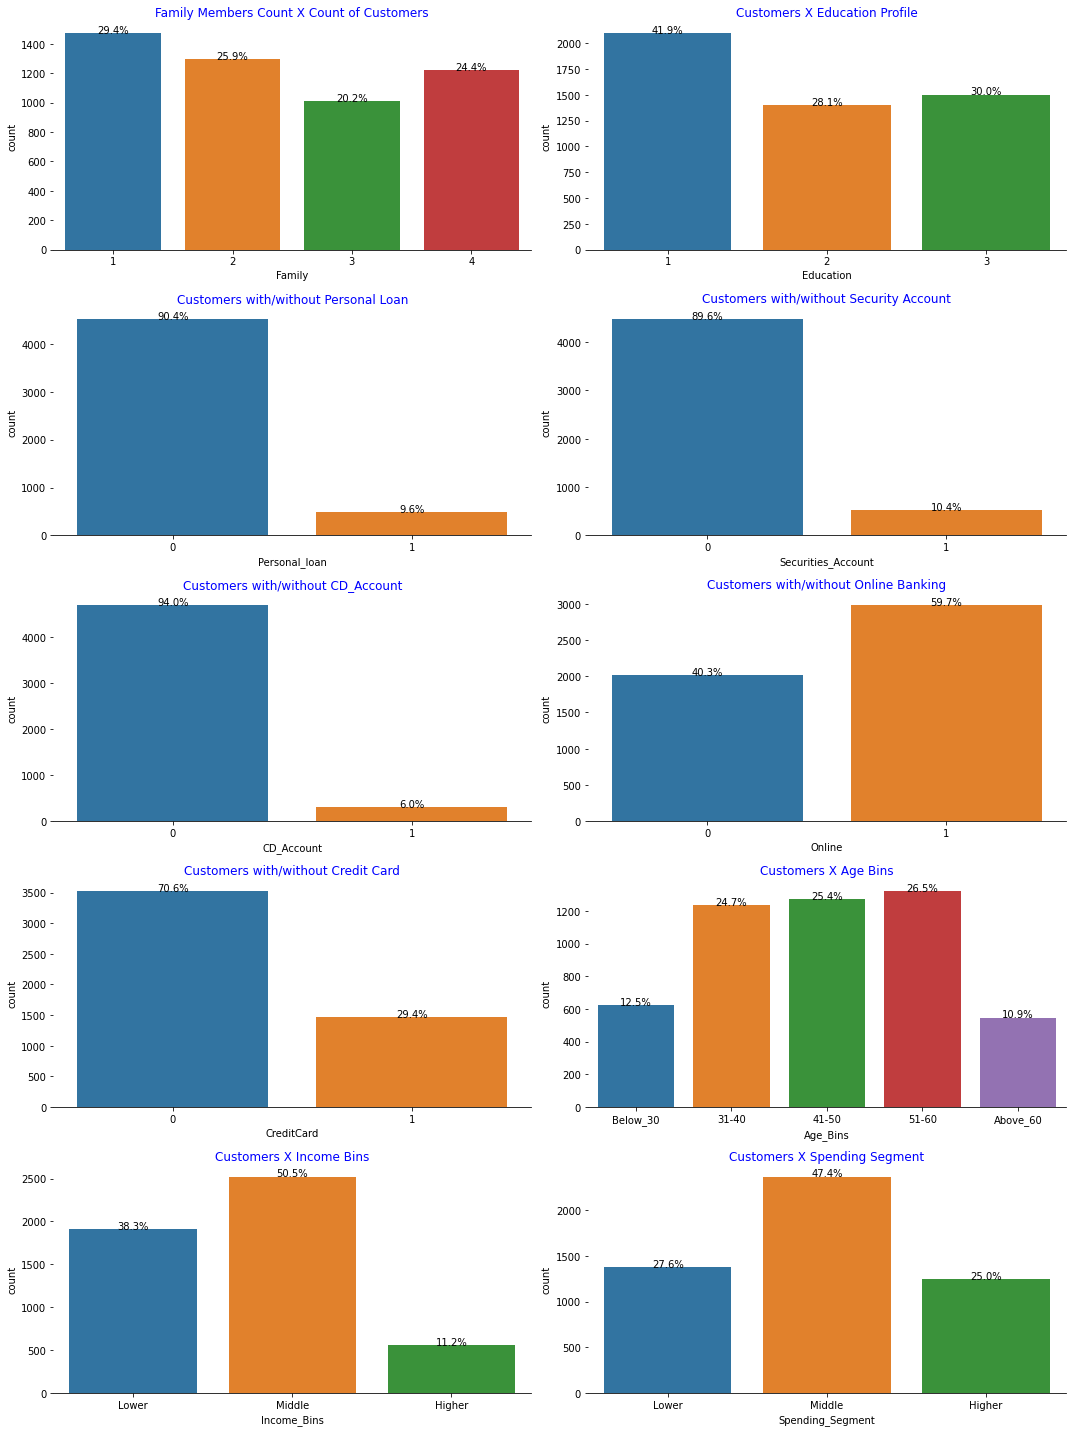

In [ ]:
univariate_categorical_graphs(customers_data, cat_cols1, title_list)

**Insights**

*   Almost One-third customers are single.
*   Close to 40% customers are undergraduates.
*   Only approximately 5% to 10% customers have Previous Loan Accounts, Security Account and/or CD_Accounts.
*   Almost 60% customers practice online transactions.
*   Two_Third customers do not have Credit Cards
*   Almost 75% customers lie between the age of 31-60
*   50% of the customers lie in Middle Income Group
*   50% of the customers have Medium Average Spending.









### Univariate Analysis - Counties

In [ ]:
# Checking count of customers by Counties for each of Target label (0 and 1)

customers_data.groupby(['County', 'Personal_loan'])['Personal_loan'].agg({'size'}).unstack()

size     
Personal_loan             0    1
County                          
9307                      1    0
92634                     5    0
92717                    19    3
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           309   30
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

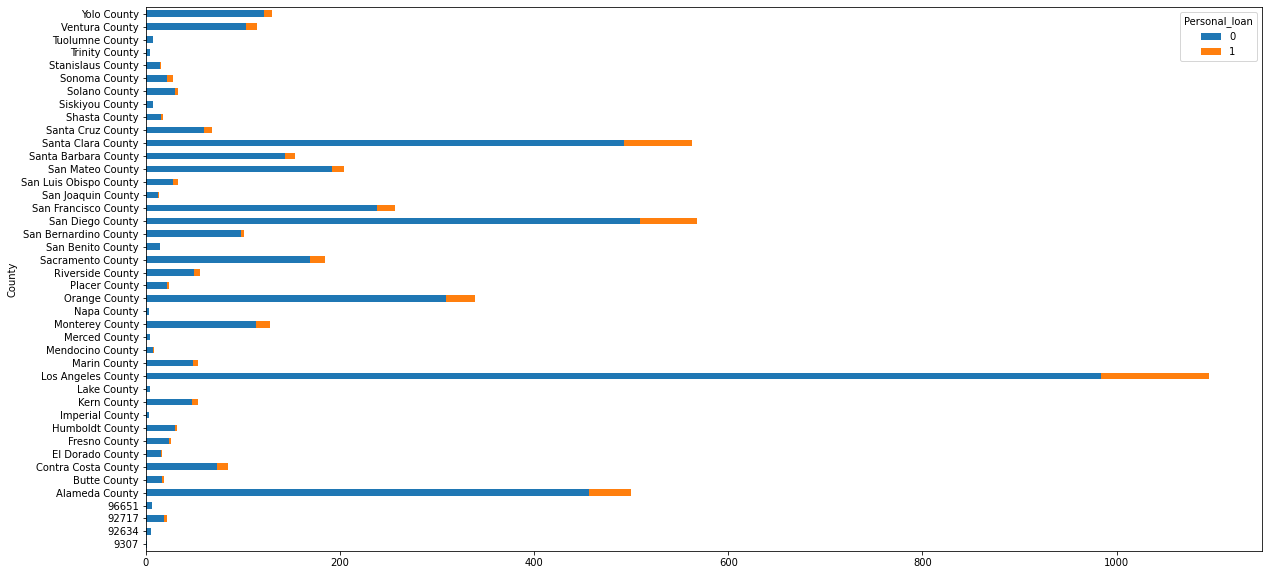

In [ ]:
# Plotting the above data via Crosstab

pd.crosstab(index=customers_data['County'], columns= customers_data['Personal_loan'].sort_values(ascending=False)).plot(kind='barh', stacked=True, figsize=(20,10))

**Counties seem to be an important feature since loans vary a lot by counties. However, they are a lot in number and this level is too granular to analyse. Thus we can map these to regions using information from Internet**

Source used for this is https://www.calbhbc.org/region-map-and-listing.html

In [ ]:
counties_region_mapping = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

Mapping Counties to Regions and adding to main Dataframe.

In [ ]:
customers_data['Regions'] = customers_data['County'].map(counties_region_mapping)

In [ ]:
# Checking Unique Regions (Should be below 6 to 7 in number)

customers_data['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [ ]:
# Veryfing null values

customers_data.isnull().sum()

Age                    0
Experience             0
Income                 0
ZIP_Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
County                 0
Age_Bins               0
Income_Bins            0
Spending_Segment       0
Regions               28
dtype: int64

We can see there are 28 rows for which, Region could not be mapped. 28 out of 5000 rows would not make a major difference to our EDA / Model, thus dropping these 28 rows.

In [ ]:
customers_data.dropna(inplace=True)

In [ ]:
# Checking the new data structure of the Dataframe

customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4972 non-null   int64   
 1   Experience          4972 non-null   int64   
 2   Income              4972 non-null   int64   
 3   ZIP_Code            4972 non-null   category
 4   Family              4972 non-null   category
 5   CCAvg               4972 non-null   float64 
 6   Education           4972 non-null   category
 7   Mortgage            4972 non-null   int64   
 8   Personal_loan       4972 non-null   category
 9   Securities_Account  4972 non-null   category
 10  CD_Account          4972 non-null   category
 11  Online              4972 non-null   category
 12  CreditCard          4972 non-null   category
 13  County              4972 non-null   category
 14  Age_Bins            4972 non-null   category
 15  Income_Bins         4972 non-null   ca

### Univariate Analysis - Region

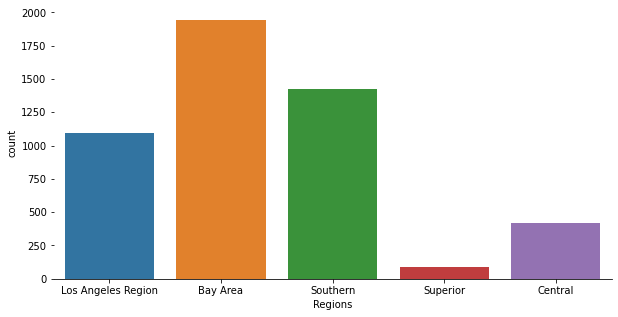

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=customers_data['Regions'], data= customers_data)
sns.despine(top=True, right=True, left=True)

**Insights-**

*   Bay Area has the maximum number of cutomers, followed by Souther Regions.
*   Superior Region has the lowest number of customers.



### EDA | Bivariate and Multivariate Analysis

##### Bivariate Analysis - Heatmap

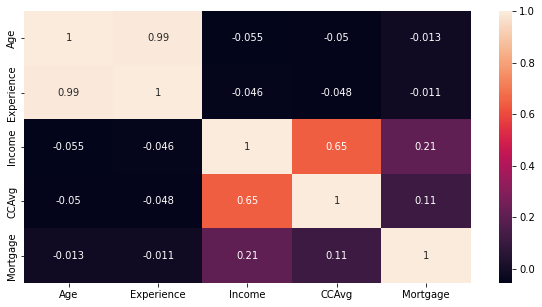

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=customers_data.corr(), annot=True)

##### Bivariate Analysis - Pairplot

<Figure size 720x360 with 0 Axes>

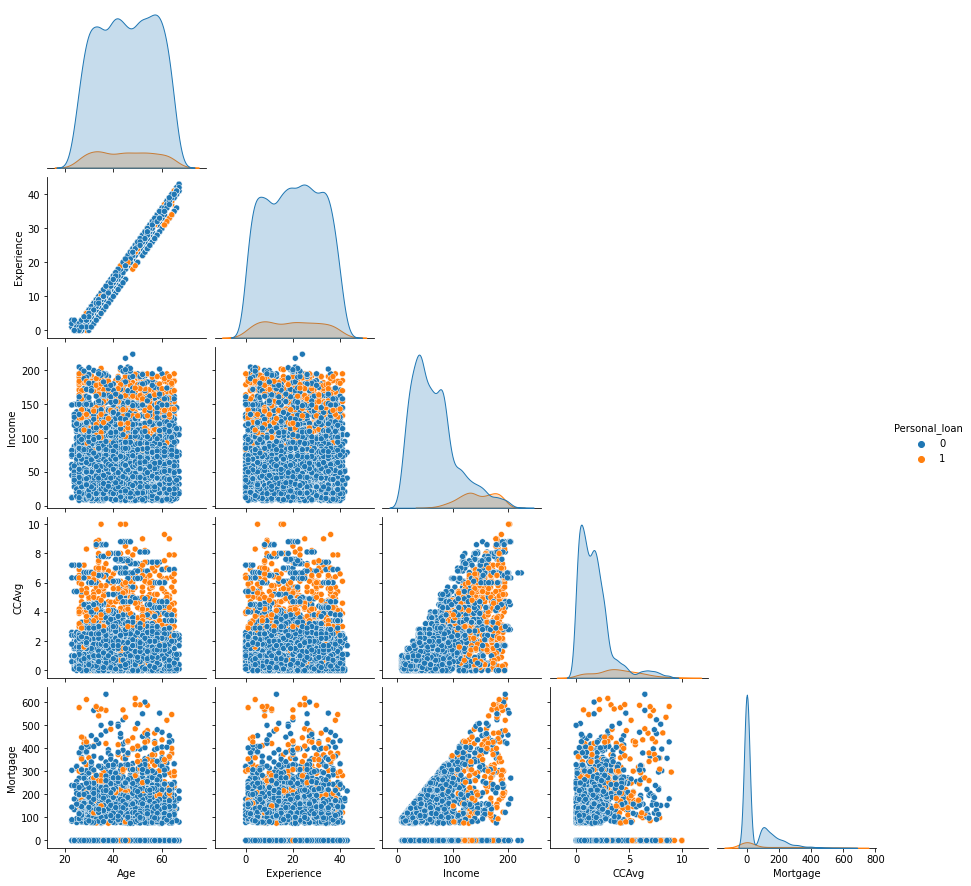

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data=customers_data, hue='Personal_loan', corner=True )

**Heatmap and Pairplot Insights-**

*   Age and Experience seem to be highly correlated, for obvious reasons.
*   Income and CCAvg are positively correlated.
*   Income and Mortage are also positively correlated.
*   High Income and High Spending seem to be consisting of a lot of potential loan buyers.





##### Bivariate Analysis - Boxplot comparison of Numerical Feature(s) vs Target

In [ ]:
num_cols = []
for i in customers_data.columns.tolist():
  if (customers_data[i].dtype == 'int64') or (customers_data[i].dtype == 'float64'):
    num_cols.append(i)

num_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [ ]:
num_title_list=['Age X Personal Loan Consumer', 'Experience X Personal Loan Consumer', 'Income X Personal Loan Consumer', 'CCAvg X Personal Loan Consumer', 'Mortgage X Personal Loan Consumer']

In [ ]:
def bivariate_numcol_graphs(dataset, feature, titleset):
  plt.figure(figsize=(8,12))
  i=0
  for i in range(len(feature)):
    plt.subplot(5,1,i+1)
    
    sns.boxplot(x=dataset['Personal_loan'], y=dataset[feature[i]], data=dataset)
    sns.despine(top=True, right=True, left=True)

    plt.title(titleset[i])
    plt.tight_layout()


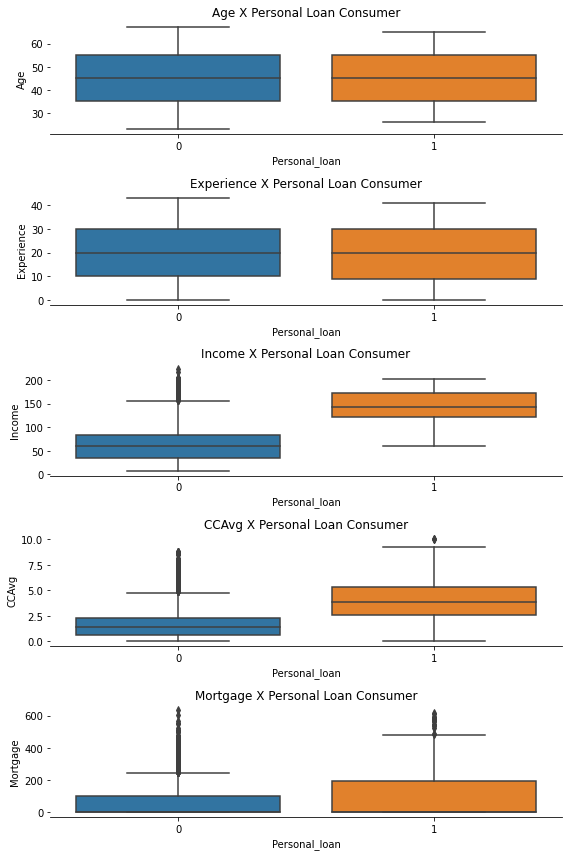

In [ ]:
bivariate_numcol_graphs(customers_data, num_cols, num_title_list)

**Insights-**

*   Neither Age, nor Experience seem to be an important for Target Variable.
*   Customers with High Income and High Credit Avaerage Spend have higher tendency of buying loans.
*   People with Loans have slighlty wider Mortgage distribution, but overall impact is not significant.






##### Bivariate Analysis - Displot comparison of CCAvg vs Target

In [ ]:
Personal_loan_taken_data=customers_data[customers_data['Personal_loan']==1]
Personal_loan_nottaken_data=customers_data[customers_data['Personal_loan']==0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


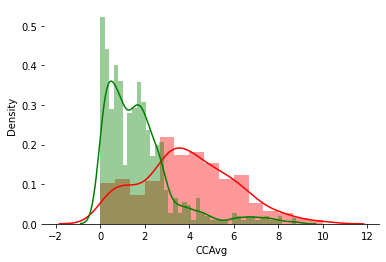

In [ ]:
sns.distplot(a=Personal_loan_taken_data['CCAvg'], color='r')
sns.distplot(a=Personal_loan_nottaken_data['CCAvg'], color='g')
sns.despine(top=True, right=True, left=True)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


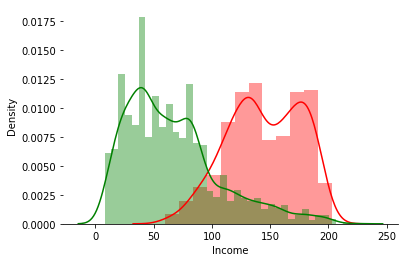

In [ ]:
sns.distplot(a=Personal_loan_taken_data['Income'], color='r')
sns.distplot(a=Personal_loan_nottaken_data['Income'], color='g')
sns.despine(top=True, right=True, left=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


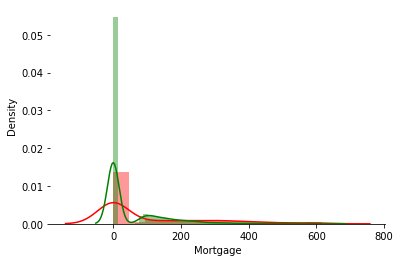

In [ ]:
sns.distplot(a=Personal_loan_taken_data['Mortgage'], color='r')
sns.distplot(a=Personal_loan_nottaken_data['Mortgage'], color='g')
sns.despine(top=True, right=True, left=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


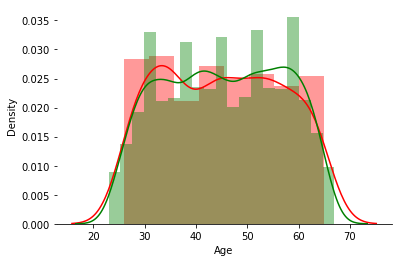

In [ ]:
sns.distplot(a=Personal_loan_taken_data['Age'], color='r')
sns.distplot(a=Personal_loan_nottaken_data['Age'], color='g')
sns.despine(top=True, right=True, left=True)
plt.show()

** Displot Comparison Insights-**

Hence our hypothesis seem to be true. The distribution of "1" is right skewed for Income and CCAvg Spend.

##### Bivariate Analysis | Stacked Bars - Categorical Feature(s) vs Target

In [ ]:
#Defining function to plot Stacked bar of Categorical Feature vs Target (0 and 1)

def stacked_bar_graph(dataset, feature):
  # Displaying Data
  tab1=pd.crosstab(index=dataset[feature], columns= customers_data['Personal_loan'], margins=True) # Calculate count of 0s and 1s for a feature
  print('*'* 55)
  print('Feature: ' , feature)
  print(tab1)
  print('-'*55)

  # PLotting Stacked Bar
  tab=pd.crosstab(index=dataset[feature], columns= customers_data['Personal_loan'], normalize='index') # Again calculating crosstab data for plot,
                                                                                                       # this time normalilizing it over rows
  tab.plot(kind='bar', stacked=True, figsize=(7,5))
  plt.xticks(rotation=90)
  labels=['Taken', 'Not Taken']
  plt.legend(loc='lower left', frameon=False)
  plt.legend(loc='upper left', labels=labels, title= 'Personal Loan Taken?', bbox_to_anchor=(1,1))

  sns.despine(top=True, right=True, left=True)
  plt.show()


In [ ]:
cat_cols2 = cat_cols1[:]
cat_cols2

['Family',
 'Education',
 'Personal_loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Age_Bins',
 'Income_Bins',
 'Spending_Segment']

In [ ]:
cat_cols2.remove('Personal_loan')
cat_cols2.append('Regions')

*******************************************************
Feature:  Family
Personal_loan     0    1   All
Family                        
1              1356  106  1462
2              1184  106  1290
3               872  132  1004
4              1083  133  1216
All            4495  477  4972
-------------------------------------------------------


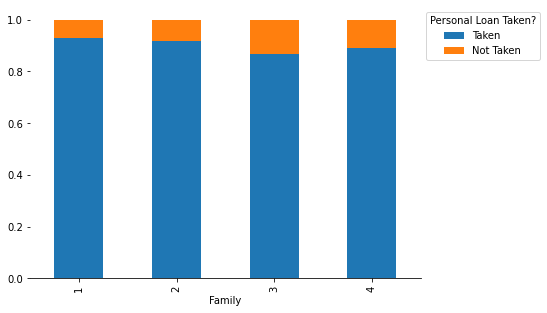

*******************************************************
Feature:  Education
Personal_loan     0    1   All
Education                     
1              1994   93  2087
2              1211  180  1391
3              1290  204  1494
All            4495  477  4972
-------------------------------------------------------


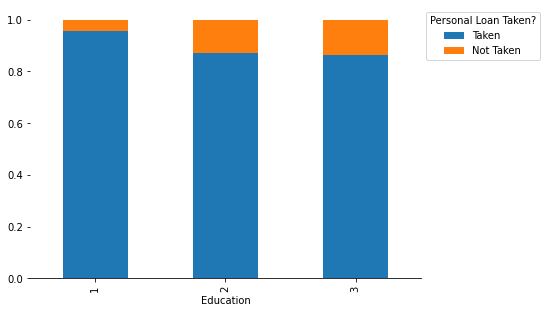

*******************************************************
Feature:  Securities_Account
Personal_loan          0    1   All
Securities_Account                 
0                   4038  417  4455
1                    457   60   517
All                 4495  477  4972
-------------------------------------------------------


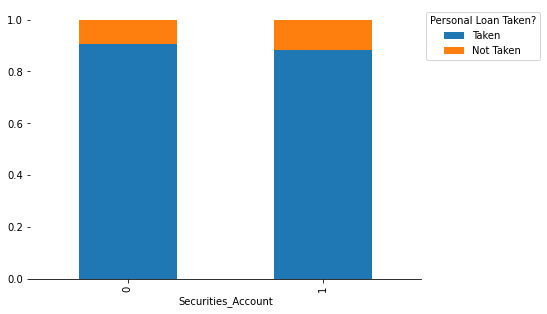

*******************************************************
Feature:  CD_Account
Personal_loan     0    1   All
CD_Account                    
0              4333  337  4670
1               162  140   302
All            4495  477  4972
-------------------------------------------------------


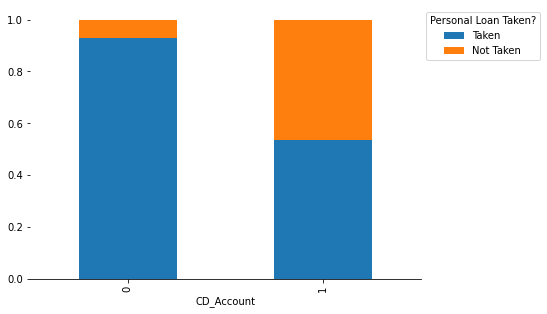

*******************************************************
Feature:  Online
Personal_loan     0    1   All
Online                        
0              1819  186  2005
1              2676  291  2967
All            4495  477  4972
-------------------------------------------------------


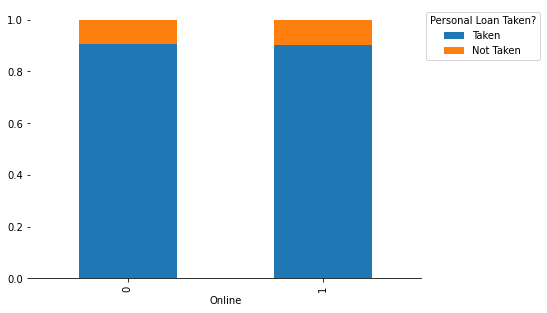

*******************************************************
Feature:  CreditCard
Personal_loan     0    1   All
CreditCard                    
0              3177  335  3512
1              1318  142  1460
All            4495  477  4972
-------------------------------------------------------


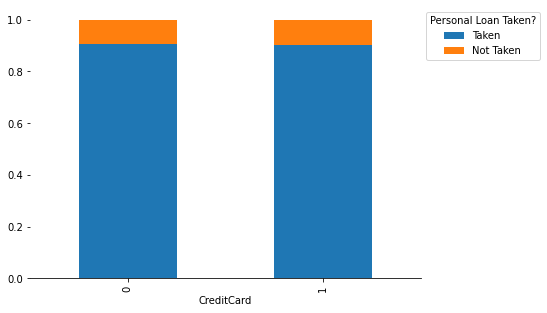

*******************************************************
Feature:  Age_Bins
Personal_loan     0    1   All
Age_Bins                      
Below_30        554   66   620
31-40          1113  116  1229
41-50          1140  121  1261
51-60          1203  115  1318
Above_60        485   59   544
All            4495  477  4972
-------------------------------------------------------


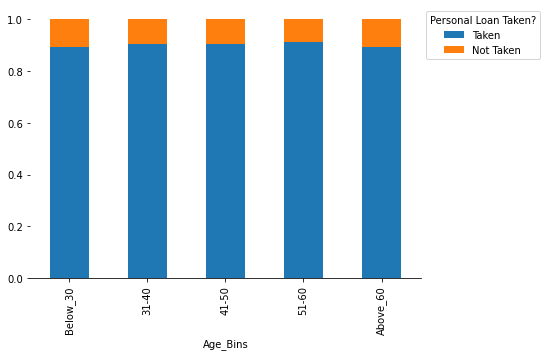

*******************************************************
Feature:  Income_Bins
Personal_loan     0    1   All
Income_Bins                   
Lower          1904    0  1904
Middle         2288  221  2509
Higher          303  256   559
All            4495  477  4972
-------------------------------------------------------


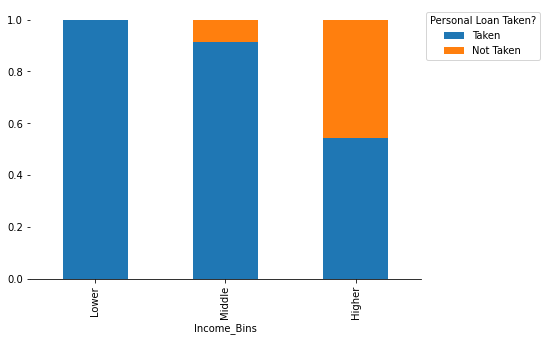

*******************************************************
Feature:  Spending_Segment
Personal_loan        0    1   All
Spending_Segment                 
Lower             1334   39  1373
Middle            2281   79  2360
Higher             880  359  1239
All               4495  477  4972
-------------------------------------------------------


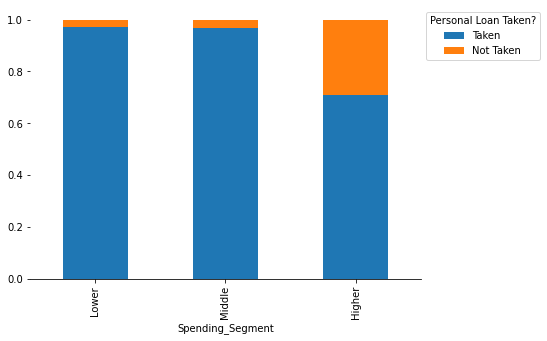

*******************************************************
Feature:  Regions
Personal_loan          0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1290  132  1422
Superior              84    8    92
All                 4495  477  4972
-------------------------------------------------------


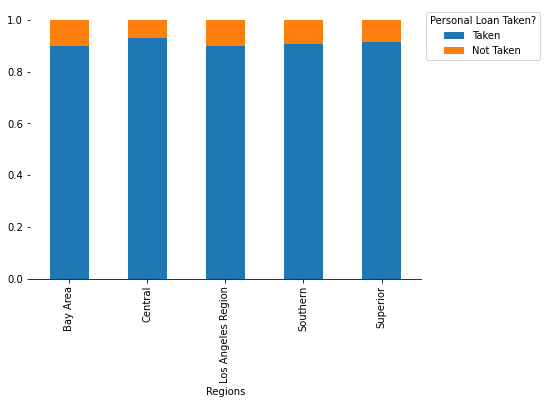

In [ ]:
for col in cat_cols2:
  stacked_bar_graph(customers_data, col)

**Insights-**

- Families of size contitute most towards loan borrowers, as compared to other families.
- Customers having a security account with bank have slightly higher chance of borrowing a loan as well.
- Customers with Online facilities show no corelation with loans.
- Customers with other bank Credit card showed no corelation with loans.
- LosAngeles and Bay region contribute maximum towards loan borrowers.
- Between 31 and 60 is most attractive age segments for loan customers.
- High spending is directly related with loans.

## Multivariate Analysis

#### Multivariate Analysis | Income and Average Spend - across Target

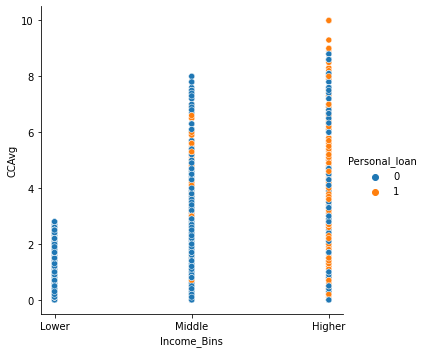

In [ ]:
sns.relplot(x=customers_data['Income_Bins'], y= customers_data['CCAvg'], hue=customers_data['Personal_loan'])

#### Multivariate Analysis | Income and Mortgage - across Target

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


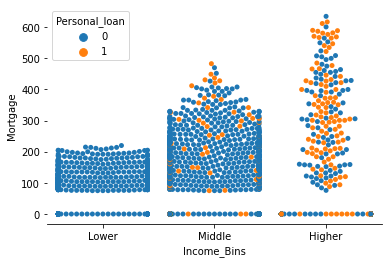

In [ ]:
sns.swarmplot(x=customers_data['Income_Bins'], y= customers_data['Mortgage'], hue=customers_data['Personal_loan'])
sns.despine(top=True, right=True, left=True)

#### Multivariate Analysis | Income and Education - across Target

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


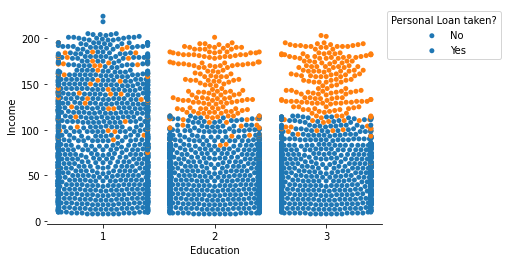

In [ ]:
sns.swarmplot(x=customers_data['Education'], y= customers_data['Income'], hue=customers_data['Personal_loan'])
sns.despine(top=True, right=True, left=True)
labels=['No', 'Yes']
plt.legend(loc='lower left', frameon=False)
plt.legend(loc='upper left', labels=labels, title='Personal Loan taken?', bbox_to_anchor=(1,1))

#### Multivariate Analysis | Income vs Age Bins vs Education - across Target

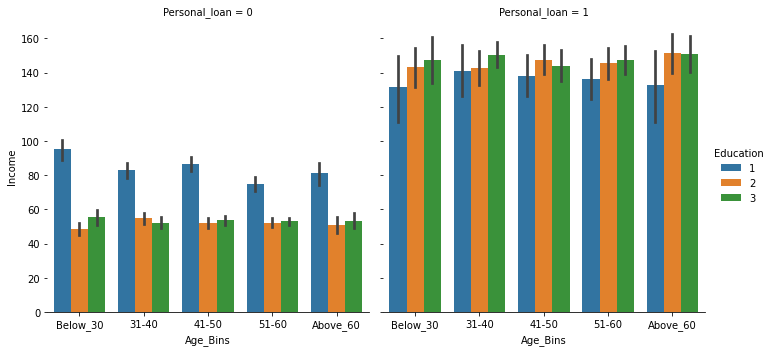

In [ ]:
sns.catplot(x='Age_Bins', y='Income', hue='Education', col='Personal_loan', data=customers_data, kind='bar')
sns.despine(top=True, right=True, left=True)

#### Multivariate Analysis | Education vs Average Spend - across Target

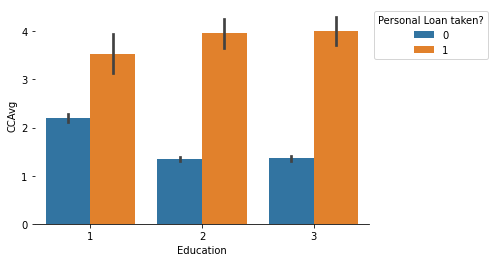

In [ ]:
sns.barplot(x='Education', y='CCAvg', hue='Personal_loan', data=customers_data)
sns.despine(top=True, right=True, left=True)
plt.legend(loc='upper left', title='Personal Loan taken?', bbox_to_anchor=(1,1))

**Multivariate Analysis | Insights :**
   
- Higher Income is an important factor in determining the loan borrowers.
    
- Higher Mortgages also drive loans to an extent. 
    
- Higher Average Spends are also linked to loan borrowers. 
   
- Income, Average Spends and Mortgage all seem to be correlated.

- Higher Education also drives Usage, Income, Mortages , and thus , loans. 



### EDA | Checking imbalance in Target Column

([<matplotlib.patches.Wedge at 0x7f8b06dfeac0>,
 [Text(-1.0504153897153627, 0.32653867925426977, ''),
  Text(1.0504153897153627, -0.32653867925426944, '')],
 [Text(-0.5729538489356523, 0.17811200686596532, '90.41%'),
  Text(0.5729538489356524, -0.17811200686596515, '9.59%')])

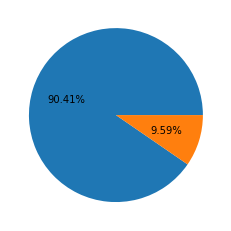

In [ ]:
plt.pie(x=customers_data['Personal_loan'].value_counts(), data= customers_data, autopct= '%1.2f%%')

The data seems to be imbalanced with respect to Target feature, which is not a good insight. It might create a biased model , or  model that is accurate for 1 label and not for another. 
This can be dealt with via techniques like SMOTE.
However, currently for academic purpose project, I am avoiding this and moving ahead without addressing this.

In [ ]:
# Making a copy of data here before proceeding to Feature Engineering

customers_data_eda= customers_data.copy()

### EDA | Insights Summary

**Knowing Data:**

*   Target Column is ***Personal Loan*** (Categorical Type)
*   We have *Age, Experience, Income, Mortgage, CCAvg* as Continous Features
*   No missing values in the data

**Data Cleaning:**

*   Experience had some erronous negative values, which were taken care of by taking absolute values.
*   Zipcodes were mapped to Counties, and to futher granularity, Counties were mapped to Regions using information from the Internet.
*   Age, Income and CCAvg were binned to derive corresponding categories for better analysis.

**EDA Insights:**

*   Customer with Higher Income, Higher CCAvg spend and Mortgaged were more likely to buy a loan.
*   Family Size of 3 or 4 are more likely to buy a loan.
*   Education Level 2: *Graduate* and Level 3: *Advanced/Professional* were good indicators of our desired segment.
*   *Los Angeles* and *Bay Area* has maximum number of Loan Buyers.
*   Customers between the age of 31-60 are most likely to buy a loan.
*   It can be inferred that the more the income, the more the tendency to spend and live a "larger than life" lifestyle.

**Tentative Profiling for Customer Segmentation:**


*   Most Probable Customers: Higher Income - Higher CCAVg spend - Higher Mortgage between the age of 31-60
*   Likely Borrowers: Customers with Middle Income, Medium Average Spends, family of 3 or 4.
*   Unlikely Customers: Rest of the Customers, say, people with lower income, Age- above 60 or below 30




















In [ ]:
# Having a look at the features once again before proceeding with Feature Selection

customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4972 non-null   int64   
 1   Experience          4972 non-null   int64   
 2   Income              4972 non-null   int64   
 3   ZIP_Code            4972 non-null   category
 4   Family              4972 non-null   category
 5   CCAvg               4972 non-null   float64 
 6   Education           4972 non-null   category
 7   Mortgage            4972 non-null   int64   
 8   Personal_loan       4972 non-null   category
 9   Securities_Account  4972 non-null   category
 10  CD_Account          4972 non-null   category
 11  Online              4972 non-null   category
 12  CreditCard          4972 non-null   category
 13  County              4972 non-null   category
 14  Age_Bins            4972 non-null   category
 15  Income_Bins         4972 non-null   ca

In [ ]:
# As per EDA, dropping columns which are either correlated to some feature or are duplicates 

customers_data.drop(columns=['Age_Bins', 'ZIP_Code', 'County', 'Experience', 'Income_Bins', 'Spending_Segment'], inplace=True)

In [ ]:
# Verifying if the features are sucessfully dropped

customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4972 non-null   int64   
 1   Income              4972 non-null   int64   
 2   Family              4972 non-null   category
 3   CCAvg               4972 non-null   float64 
 4   Education           4972 non-null   category
 5   Mortgage            4972 non-null   int64   
 6   Personal_loan       4972 non-null   category
 7   Securities_Account  4972 non-null   category
 8   CD_Account          4972 non-null   category
 9   Online              4972 non-null   category
 10  CreditCard          4972 non-null   category
 11  Regions             4972 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 397.0+ KB


### Feature Engineering | Creating Dummies

4 of our categorical variables are already in binary, namely:

*   Securites_Account
*   CD_Account
*   Online
*   CreditCard

Thus, creating dummies for:

*   Regions
*   Education







In [ ]:
# Creating Feature Set 'X' anf Target Set 'Y' saperately

X= customers_data.drop(columns=['Personal_loan'])
Y= customers_data['Personal_loan']

# Creating dummies for 'Regions' and 'Education'
dummie_features=['Regions', 'Education']
X= pd.get_dummies(X, columns= dummie_features, drop_first=True)

### Feature Engineering | Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2,train_size=0.8, random_state=0 )

### Feature Engineering | Feature Scaling using Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit(x_train)

x_train_scaled = x_scaler.fit_transform(x_train)
x_train_scaled_df = pd.DataFrame(data=x_train_scaled, columns= x_train.columns)


x_test_scaled = x_scaler.transform(x_test)
x_test_scaled_df = pd.DataFrame(data=x_test_scaled, columns= x_test.columns)

x_train_scaled_df.index = np.arange(len(x_train_scaled_df))
x_test_scaled_df.index = np.arange(len(x_test_scaled_df))
y_train.index = np.arange(len(y_train))
y_test.index = np.arange(len(y_test))

# <center> Logistic Regression

As we have discussed before, there are multiple evaluation metrics which can be used in case of Classification. But which one should be given most importance?
This varies problem to problem, and for this probem let's look at how we can choose our best measurement metric.


####  There can be following errors our model can make - 
1. Type 1 Error : Model Predicts customer will opt for loan but he/she doesn't. (Loss of Resources)
2. Type 2 Error : Model Predicts customer will not opt for loan but he/she does. .(Opportunity loss)

#### Which of the above is more important ?
* The main objecive of this project is to acquire more customers, hence Type 2 error is of more significance here. It is okay if some of the marketing budget is spent incorrectly but we should not miss out on potential customers. 

* For this reason, Recall is the right metric to measure performance. Accuracy could also have been used, but since our data is imbalanced, it would not be a very prudent choice

#### Conclusion : Recall is the right Perfomance Metric choice


#### Defining Functions

In [ ]:
# Defining Function for Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def get_confusion_matrix(y_true, y_pred, title):
  fig, ax= plt.subplots(1,1)         # Defining figure and axes object

  c_matrix= confusion_matrix(y_true, y_pred, labels=[0,1])    # Getting data for Confusion Matrix
  display = ConfusionMatrixDisplay(c_matrix, display_labels=['NO', 'YES'])   # Displaying Confusion Matrix

  display.plot(cmap='Greens', colorbar=True, ax=ax)
  ax.set_title(title)
  plt.tick_params(axis= 'both', which= 'both', length=0 )
  plt.grid(b=None, axis= 'both', which= 'both', visible=False)
  plt.show()



In [ ]:
# Defining function for Metrics calculation and display
# This function would calculate various metrics for a given model - Accuracy, Precision
# Recal and F1score. 
# Classifier: Model classifier
# x_train_data, x_test_data: Train / Test features
# y_train_data, y_test_data: Train / Test Target Variable
# statsklearn: 1 if using adjusted threshold, else 0
# threshold: Adjusted or optimized threshold value for statsklearn=1
# flag: If true, print all metrics, else False (Default)
# roc: If true, display ROC score, else False (Default)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def fetch_metrics(classifier, x_train_data, x_test_data, y_train_data, y_test_data, statsklearn, threshold=0.5, flag=True, roc=False):

  score_list=[]    # Empty list to store train and test performance scores

  if statsklearn==0:
    pred_train = classifier.predict(x_train_data)   # Predict Train Data
    pred_test = classifier.predict(x_test_data)     # Predict Test Data
  else:
    pred_train = (classifier.predict(x_train_data)>threshold)  # Predict Train data using specified threshold
    pred_test = (classifier.predict(x_test_data)>threshold)    # Predict Test data using specified threshold

  pred_train = np.round(pred_train)
  pred_test = np.round(pred_test)

  #calculation accuracies
  train_acc = accuracy_score(y_train_data, pred_train)
  test_acc = accuracy_score(y_test_data, pred_test)

  #calculation recall
  train_recall = recall_score(y_train_data, pred_train)
  test_recall = recall_score(y_test_data, pred_test)

  #calculation precision
  train_precision = precision_score(y_train_data, pred_train)
  test_precision = precision_score(y_test_data, pred_test)

  #calculation precission
  train_f1 = f1_score(y_train_data, pred_train)
  test_f1 = f1_score(y_test_data, pred_test)

  #add all scores to our score list
  score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))
  
  #display all scores if flag=True
  if flag==True:
    print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
    print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_data,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_data,pred_test),3))
    print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_data,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_data,pred_test),3))
        
    print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_data,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_data,pred_test),3))
    print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_data,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_data,pred_test),3))
    get_confusion_matrix(y_train_data,pred_train,"Confusion Matrix for Train")     
    get_confusion_matrix(y_test_data,pred_test,"Confusion Matrix for Test") 
  
  #display roc auc if roc=true
  if roc==True:
    print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_data,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_data,pred_test),3))

  

  #return all scores
  return score_list



### Model-1 - Logistic Regression with Sklearn library

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced')
model = log_reg.fit(x_train_scaled_df, y_train)

sk_stat=0


 MODEL PERFORMANCE
 Accuracy   : Train: 0.905  Test:  0.897
 Recall     : Train: 0.903  Test: 0.875
 Precision  : Train: 0.502  Test:  0.483
 F1         : Train: 0.645  Test: 0.622


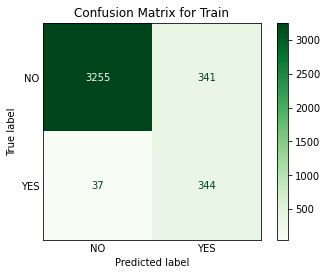

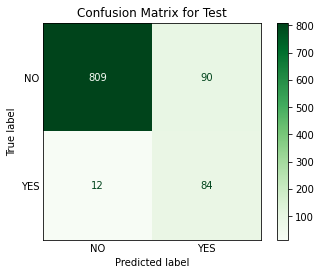

In [ ]:
# Checking Model performances

scores_Sklearn = fetch_metrics(model, x_train_scaled_df, x_test_scaled_df, y_train, y_test, sk_stat)

Computing ROC-AUC scrore and graph for the above model.

In [ ]:
# predicting probability of a customer being a loan buyer or not

y_pred11=log_reg.predict_proba(x_test_scaled_df)[:,1]  
y_pred1 = y_pred11.reshape(-1,1)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

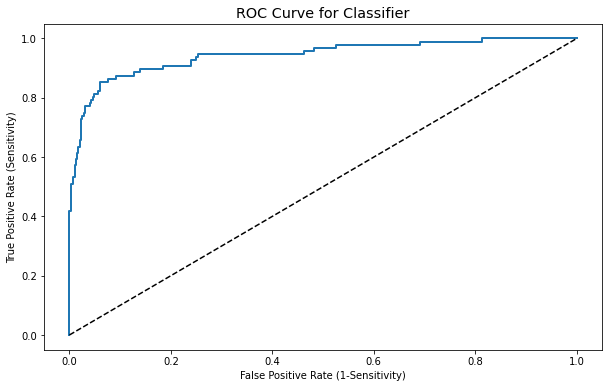

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--')

plt.rcParams['font.size']=12

plt.title('ROC Curve for Classifier')

plt.xlabel('False Positive Rate (1-Sensitivity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC: {:.4f}'.format(ROC_AUC))

ROC AUC: 0.9429


**Interpretation**
The model is 94.30% efficient. The model states that majorly there is going to be no significant growth in the loan buyers.

There is hardly a portion of 9.60% customers, that would opt for loan buying. The bank should be grab these opportunities.

The rest would most probably not opt for loan.

In [ ]:
# Having a look at the train data

x_train_scaled_df.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Regions_Central,Regions_Los Angeles Region,Regions_Southern,Regions_Superior,Education_2,Education_3
0,-0.030769,-1.163558,-1.204130,-0.674689,-0.551630,-0.344994,-0.255662,0.826887,-0.648350,-0.299314,-0.53422,-0.631955,-0.141439,-0.623781,1.537737
1,-0.727525,-0.294880,1.401797,0.100269,1.594444,-0.344994,-0.255662,0.826887,-0.648350,3.340970,-0.53422,-0.631955,-0.141439,-0.623781,1.537737
2,-0.030769,-1.185275,0.533155,-0.818200,-0.551630,-0.344994,-0.255662,0.826887,-0.648350,-0.299314,-0.53422,-0.631955,-0.141439,1.603128,-0.650306
3,-1.337187,1.876816,-1.204130,1.363164,1.910916,-0.344994,-0.255662,0.826887,-0.648350,-0.299314,-0.53422,1.582392,-0.141439,-0.623781,-0.650306
4,-1.162998,-0.642351,1.401797,-0.990413,-0.551630,2.898602,3.911417,0.826887,1.542378,-0.299314,-0.53422,-0.631955,-0.141439,-0.623781,-0.650306


### Model - 2 Logistic Regression with Sklearn library after dropping few features. 

Since we earlier noted that Age, Mortage and Regions have a little impact on our target variable, dropping these  and viewing what the result might be.

In [ ]:
x_train_scaled_df2= x_train_scaled_df.drop(columns=['Age', 'Mortgage', 'Regions_Los Angeles Region', 'Regions_Central', 'Regions_Southern', 'Regions_Superior'])
x_test_scaled_df2= x_test_scaled_df.drop(columns=['Age', 'Mortgage', 'Regions_Los Angeles Region', 'Regions_Central', 'Regions_Southern', 'Regions_Superior'])

In [ ]:
# Checking Model2 performances
model2 = log_reg.fit(x_train_scaled_df2, y_train)

sk_stat=0

 MODEL PERFORMANCE
 Accuracy   : Train: 0.908  Test:  0.895
 Recall     : Train: 0.908  Test: 0.885
 Precision  : Train: 0.511  Test:  0.478
 F1         : Train: 0.654  Test: 0.62


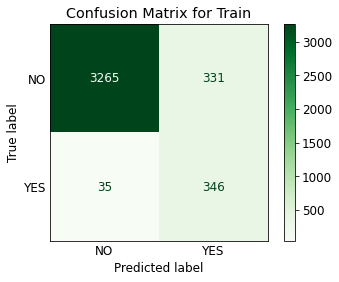

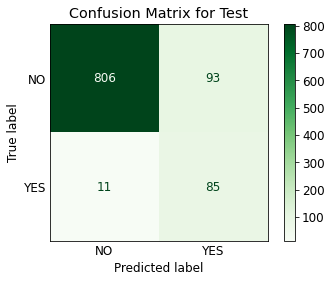

In [ ]:
scores_Sklearn2 = fetch_metrics(model2, x_train_scaled_df2, x_test_scaled_df2, y_train, y_test, sk_stat)

In [ ]:
# predicting probability of a customer being a loan buyer or not

y_pred22=log_reg.predict_proba(x_test_scaled_df2)[:,1]
y_pred2 = y_pred22.reshape(-1,1)

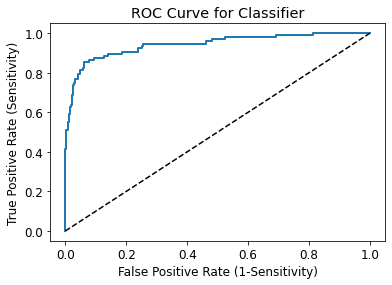

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--')

plt.title('ROC Curve for Classifier')

plt.xlabel('False Positive Rate (1-Sensitivity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
ROC_AUC2 = roc_auc_score(y_test, y_pred2)
print('ROC AUC: {:.4f}'.format(ROC_AUC2))

ROC AUC: 0.9443


**Interpretation**

The efficiency of the model is increased by 1.4% by dropping some features.


However, the model conclusion still remains the same as mentioned in the earlier model.


### Model - 3 Logistic Regression with Sklearn library after dropping few features and Optimising thresholds.

### Optimising Thresholds

In [ ]:
optimal_index = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_index]
print('Optimum Threshold is = {:.4f}'.format(optimal_threshold) )

Optimum Threshold is = 0.6718


 MODEL PERFORMANCE
 Accuracy   : Train: 0.908  Test:  0.895
 Recall     : Train: 0.908  Test: 0.885
 Precision  : Train: 0.511  Test:  0.478
 F1         : Train: 0.654  Test: 0.62


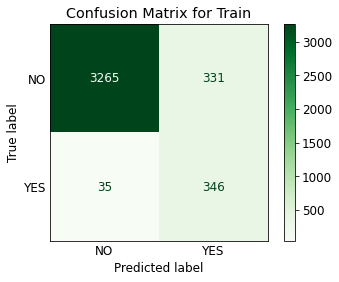

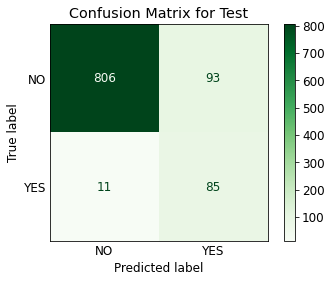

In [ ]:
# Checking Model3 performances

model3 = log_reg.fit(x_train_scaled_df2, y_train)
scores_Sklearn3 = fetch_metrics(model3, x_train_scaled_df2, x_test_scaled_df2, y_train, y_test, statsklearn=1, threshold=optimal_threshold)

In [ ]:
# predicting probability of a customer being a loan buyer or not

y_pred33=log_reg.predict_proba(x_test_scaled_df2)[:,1]
y_pred3 = y_pred33.reshape(-1,1)

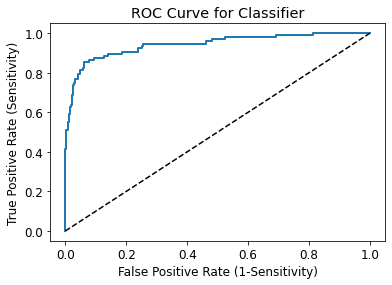

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--')

plt.title('ROC Curve for Classifier')

plt.xlabel('False Positive Rate (1-Sensitivity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
ROC_AUC3 = roc_auc_score(y_test, y_pred3)
print('ROC AUC: {:.4f}'.format(ROC_AUC3))

ROC AUC: 0.9443


**Observation**
By dropping some features as mentioned and optimising threshold value as 0.67, the Recall score has increased from 87.5% to 88.5%. Accuracy is dropped by 0.2%, yet model efficiency is 94.45%, but we are interested in improving the Recall Score.

Thus, this model is the best to use.

#<center> Summary

- First we did an exhaustive EDA on our data to find important insights, and then developed 3 Logistic Regression models:
   * Model 1 : Using sklearn
   * Model 2 : Improved Feature Selection in Model 1
   * Model 4 : Improved threshold in Model 2
- The performance of all models was compared mainly on Recall. Model 3 can be treated as best model and can be used to make predictions.
- As per EDA & Regression model, the most important features for a loan borrower are Income,Education, CD account ,Family and CCAvg . 
- Other important factors as per EDA for most likely borrowers are : Customers with graduate degree, customers having 3 family members 